# 20211473 이동호 10주차 2차시 과제

### 01-baseball-salary-prediction-Copy1.ipynb파일을 참고하여 타자들에 대해 2018년 연봉을 맞추는 프로그램을 작성하시오.

## 그래프 폰트 오류 발생시 'AppleGothic' 대신 'NanumGothic'과 같은 다른 폰트로 수정바랍니다

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### [프로야구 연봉 데이터셋 불러오기]

In [2]:
# Data Source : http://www.statiz.co.kr/

picher_file_path = '../data/picher_stats_2017.csv'
batter_file_path = '../data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

In [3]:
batter.columns

Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

In [4]:
batter.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,...,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,...,20,0.39,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500
3,나성범,NC,125,561,498,173,24,103,99,48,...,17,0.413,0.347,0.415,0.584,0.999,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,576,193,20,113,80,83,...,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000


In [5]:
batter.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,...,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,...,20,0.39,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500
3,나성범,NC,125,561,498,173,24,103,99,48,...,17,0.413,0.347,0.415,0.584,0.999,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,576,193,20,113,80,83,...,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000


In [6]:
print(picher.shape)
print(batter.shape)
batter.columns

(152, 22)
(191, 21)


Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

-----

In [7]:
import matplotlib as mpl

In [8]:
mpl.rc('font', family='AppleGothic')

###### 예측할 대상인 '연봉'에 대한 정보

In [9]:
batter['연봉(2018)'].describe()

count       191.000000
mean      20625.654450
std       31978.855209
min        2700.000000
25%        4200.000000
50%        7500.000000
75%       25000.000000
max      250000.000000
Name: 연봉(2018), dtype: float64

<Axes: >

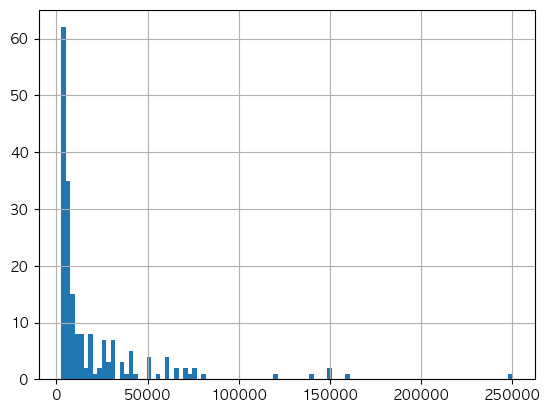

In [10]:
batter['연봉(2018)'].hist(bins=100) # 2018년 연봉 분포를 출력합니다.

<Axes: >

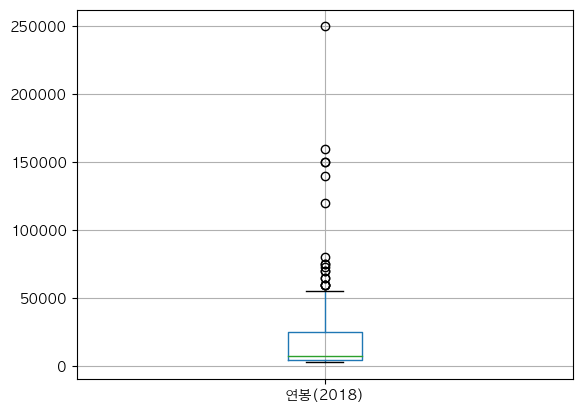

In [11]:
batter.boxplot(column=['연봉(2018)']) # 연봉의 Boxplot을 출력합니다.

-----

### [회귀 분석에 사용할 피처 살펴보기]

In [12]:
batter_features_df = batter[['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)']]

In [13]:
batter = batter.drop('BABIP', axis=1)

In [14]:
print(batter.columns)

Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)', '연봉(2017)'],
      dtype='object')


In [15]:
print(batter_features_df)

      경기   타석   타수   안타  홈런   득점   타점  볼넷   삼진  도루  BABIP     타율    출루율  \
0    130  527  430  136  46   89  113  70  107   1  0.316  0.316  0.427   
1    142  629  514  176  26   98  120  96   82   0  0.362  0.342  0.450   
2    131  543  483  177  20   91   78  41   64  20   0.39  0.366  0.424   
3    125  561  498  173  24  103   99  48  116  17  0.413  0.347  0.415   
4    144  667  576  193  20  113   80  83   96  25  0.374  0.335  0.420   
..   ...  ...  ...  ...  ..  ...  ...  ..  ...  ..    ...    ...    ...   
186  135  391  351   78   4   39   40  26   55   3  0.252  0.222  0.284   
187   88  327  299   83   1   38   21  15   58   8   0.34  0.278  0.311   
188  114  372  333   89   2   28   35  17   66   5  0.327  0.267  0.323   
189   57  116  106   18   0   11   10   8   13   0  0.191  0.170  0.233   
190   67  145  131   29   0   23    2   5   15   4   0.25  0.221  0.255   

       장타율    OPS   wOBA   WAR  연봉(2018)  연봉(2017)  
0    0.684  1.111  0.442  7.30    120000    12

In [16]:
# 피처 각각에 대한 histogram을 출력합니다.
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    # df의 column 갯수 만큼의 subplot을 출력합니다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

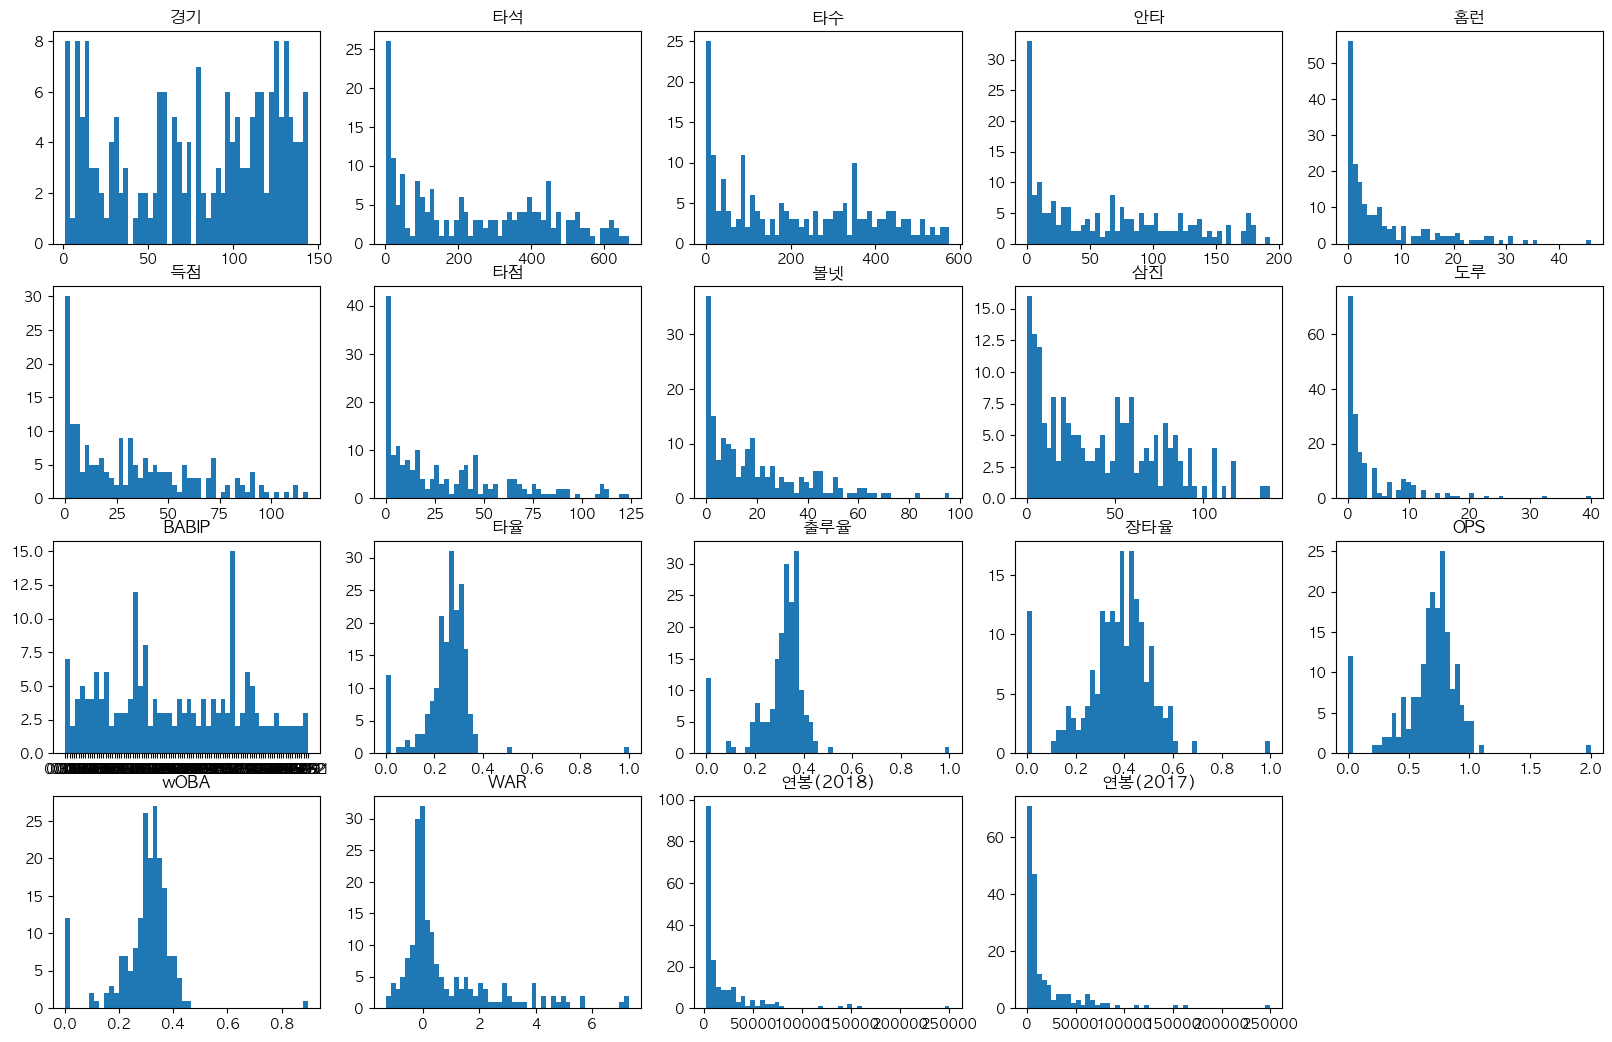

In [17]:
plot_hist_each_column(batter_features_df)

-----

### [타자의 연봉 예측]

### [피처들의 단위 맞춰주기 : 피처 스케일링]

In [18]:
# pandas 형태로 정의된 데이터를 출력할 때, scientific-notation이 아닌 float 모양으로 출력되게 해줍니다.
pd.options.mode.chained_assignment = None

In [19]:
# 피처 각각에 대한 scaling을 수행하는 함수를 정의합니다.
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        print(col)
        print(df[col].dtype)
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [20]:
print(batter_features_df)

      경기   타석   타수   안타  홈런   득점   타점  볼넷   삼진  도루  BABIP     타율    출루율  \
0    130  527  430  136  46   89  113  70  107   1  0.316  0.316  0.427   
1    142  629  514  176  26   98  120  96   82   0  0.362  0.342  0.450   
2    131  543  483  177  20   91   78  41   64  20   0.39  0.366  0.424   
3    125  561  498  173  24  103   99  48  116  17  0.413  0.347  0.415   
4    144  667  576  193  20  113   80  83   96  25  0.374  0.335  0.420   
..   ...  ...  ...  ...  ..  ...  ...  ..  ...  ..    ...    ...    ...   
186  135  391  351   78   4   39   40  26   55   3  0.252  0.222  0.284   
187   88  327  299   83   1   38   21  15   58   8   0.34  0.278  0.311   
188  114  372  333   89   2   28   35  17   66   5  0.327  0.267  0.323   
189   57  116  106   18   0   11   10   8   13   0  0.191  0.170  0.233   
190   67  145  131   29   0   23    2   5   15   4   0.25  0.221  0.255   

       장타율    OPS   wOBA   WAR  연봉(2018)  연봉(2017)  
0    0.684  1.111  0.442  7.30    120000    12

In [21]:
# 피처 각각에 대한 scaling을 수행합니다.
scale_columns = ['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)']
batter_df = standard_scaling(batter, scale_columns)

경기
int64
타석
int64
타수
int64
안타
int64
홈런
int64
득점
int64
타점
int64
볼넷
int64
삼진
int64
도루
int64
타율
float64
출루율
float64
장타율
float64
OPS
float64
wOBA
float64
WAR
float64
연봉(2018)
int64
연봉(2017)
int64


In [22]:
batter_df = batter_df.rename(columns={'연봉(2018)': 'y'})
batter_df.head(5)

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,타율,출루율,장타율,OPS,wOBA,WAR,y,연봉(2017)
0,최정,SK,1.149505,1.434367,1.231734,1.344928,4.621390,1.871933,2.601791,2.595310,1.960099,-0.448042,0.647202,1.064628,2.156064,1.732763,1.380264,3.857382,3.107502,3.264136
1,최형우,KIA,1.413314,1.952604,1.716832,2.074446,2.289944,2.174277,2.823399,3.927160,1.204511,-0.615839,0.899677,1.267954,1.424382,1.397014,1.268659,3.798140,4.045622,4.234754
2,박건우,두산,1.171489,1.515659,1.537807,2.092684,1.590510,1.939120,1.493746,1.109785,0.660487,2.740086,1.132730,1.038107,1.465031,1.318014,1.212856,3.703353,0.512037,0.012569
3,나성범,NC,1.039584,1.607113,1.624432,2.019732,2.056799,2.342246,2.158573,1.468360,2.232111,2.236697,0.948230,0.958544,1.478581,1.290364,1.138453,2.873969,0.699661,0.514054
4,손아섭,롯데,1.457283,2.145672,2.074881,2.384491,1.590510,2.678185,1.557063,3.261235,1.627640,3.579067,0.831703,1.002746,1.004343,1.033615,0.971045,2.850272,4.045622,1.484672


-----

### [피처들의 단위 맞춰주기 : one-hot-encoding]

In [23]:
# 팀명 피처를 one-hot encoding으로 변환합니다.
team_encoding = pd.get_dummies(batter_df['팀명'])
batter_df = batter_df.drop('팀명', axis=1)
batter_df = batter_df.join(team_encoding)

In [24]:
team_encoding.head(20)

,KIA,KT,LG,NC,SK,넥센,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0


In [25]:
batter_df.head()

,선수명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,...,KIA,KT,LG,NC,SK,넥센,두산,롯데,삼성,한화
0,최정,1.149505,1.434367,1.231734,1.344928,4.621390,1.871933,2.601791,2.595310,1.960099,...,0,0,0,0,1,0,0,0,0,0
1,최형우,1.413314,1.952604,1.716832,2.074446,2.289944,2.174277,2.823399,3.927160,1.204511,...,1,0,0,0,0,0,0,0,0,0
2,박건우,1.171489,1.515659,1.537807,2.092684,1.590510,1.939120,1.493746,1.109785,0.660487,...,0,0,0,0,0,0,1,0,0,0
3,나성범,1.039584,1.607113,1.624432,2.019732,2.056799,2.342246,2.158573,1.468360,2.232111,...,0,0,0,1,0,0,0,0,0,0
4,손아섭,1.457283,2.145672,2.074881,2.384491,1.590510,2.678185,1.557063,3.261235,1.627640,...,0,0,0,0,0,0,0,1,0,0


-----

### [회귀 분석 적용하기]

##### 회귀 분석을 위한 학습, 테스트 데이터셋 분리

In [26]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리합니다.
X = batter_df[batter_df.columns.difference(['선수명', 'y'])]
y = batter_df['y'] #2018년 연봉은 y로 놓음...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

##### 회귀 분석 계수 학습 & 학습된 계수 출력

In [27]:
# 회귀 분석 계수를 학습합니다 (회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)  # 선(평면)을 찾음.....

In [28]:
# 학습된 계수를 출력합니다.
print(lr.coef_)

[-0.00333641 -0.07784737  0.04090013 -0.10879474 -0.3661186  -0.03707731
  0.08085189  1.0122243   0.02378559 -0.07512602  0.0297893   0.0294196
 -0.08848732  0.23265688  0.35811983 -0.0109113  -0.01886201  0.21941953
  0.84534262 -0.16945582 -0.59827401 -2.19258977  1.82964593  0.07164417
 -0.08553639  0.01011655  0.12167956]


In [29]:
batter_df.columns

Index(['선수명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루', '타율',
       '출루율', '장타율', 'OPS', 'wOBA', 'WAR', 'y', '연봉(2017)', 'KIA', 'KT', 'LG',
       'NC', 'SK', '넥센', '두산', '롯데', '삼성', '한화'],
      dtype='object')

-----

### [예측 모델 평가하기]

### [어떤 피처가 가장 영향력이 강한 피처일까]

In [30]:
!pip install statsmodels

In [31]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행합니다.
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     67.34
Date:                Sun, 14 May 2023   Prob (F-statistic):           5.85e-61
Time:                        17:55:23   Log-Likelihood:                 9.2316
No. Observations:                 152   AIC:                             33.54
Df Residuals:                     126   BIC:                             112.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0131      0.019      0.698      0.487      -0.024       0.050
KIA           -0.0020      0.072     -0.028      0.978      -0.145       0.141
KT            -0.0765      0.068     -1.119      0.265      -0.212       0.059
LG             0.0422      0.063      0.666      0.506      -0.083       0.168
NC            -0.1075      0.063     -1.700      0.092      -0.233       0.018
OPS           -0.3661      0.301     -1.217      0.226      -0.961       0.229
SK            -0.0358      0.064     -0.557      0.579      -0.163       0.091
WAR            0.0809      0.102      0.795      0.428      -0.120       0.282
wOBA           1.0122      0.898      1.128      0.262      -0.764       2.789
경기             0.0238      0.083      0.288      0.774      -0.140       0.187
넥센            -0.0738      0.060     -1.228      0.222      -0.193       0.045
도루             0.0298      0.032      0.938      0.350      -0.033       0.093
두산             0.0307      0.070      0.436      0.663      -0.109       0.170
득점            -0.0885      0.107     -0.829      0.409      -0.300       0.123
롯데             0.2340      0.068      3.419      0.001       0.099       0.369
볼넷             0.3581      0.112      3.208      0.002       0.137       0.579
삼성            -0.0096      0.062     -0.154      0.878      -0.133       0.114
삼진            -0.0189      0.069     -0.275      0.784      -0.155       0.117
안타             0.2194      0.351      0.624      0.533      -0.476       0.915
연봉(2017)       0.8453      0.039     21.791      0.000       0.769       0.922
장타율           -0.1695      0.177     -0.957      0.340      -0.520       0.181
출루율           -0.5983      0.462     -1.296      0.197      -1.512       0.316
타석            -2.1926      1.171     -1.873      0.063      -4.510       0.124
타수             1.8296      1.226      1.493      0.138      -0.596       4.255
타율             0.0716      0.084      0.854      0.394      -0.094       0.238
타점            -0.0855      0.120     -0.714      0.476      -0.323       0.151
한화             0.0114      0.061      0.186      0.853      -0.110       0.133
홈런             0.1217      0.095      1.281      0.202      -0.066       0.310
==============================================================================
Omnibus:                      115.025   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3010.107
Skew:                           2.221   Prob(JB):                         0.00
Kurtosis:                      24.343   Cond. No.                     8.81e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.06e-29. This might indicate

[Text(0, 0, 'const'),
 Text(1, 0, 'KIA'),
 Text(2, 0, 'KT'),
 Text(3, 0, 'LG'),
 Text(4, 0, 'NC'),
 Text(5, 0, 'OPS'),
 Text(6, 0, 'SK'),
 Text(7, 0, 'WAR'),
 Text(8, 0, 'wOBA'),
 Text(9, 0, '경기'),
 Text(10, 0, '넥센'),
 Text(11, 0, '도루'),
 Text(12, 0, '두산'),
 Text(13, 0, '득점'),
 Text(14, 0, '롯데'),
 Text(15, 0, '볼넷'),
 Text(16, 0, '삼성'),
 Text(17, 0, '삼진'),
 Text(18, 0, '안타'),
 Text(19, 0, '연봉(2017)'),
 Text(20, 0, '장타율'),
 Text(21, 0, '출루율'),
 Text(22, 0, '타석'),
 Text(23, 0, '타수'),
 Text(24, 0, '타율'),
 Text(25, 0, '타점'),
 Text(26, 0, '한화'),
 Text(27, 0, '홈런')]

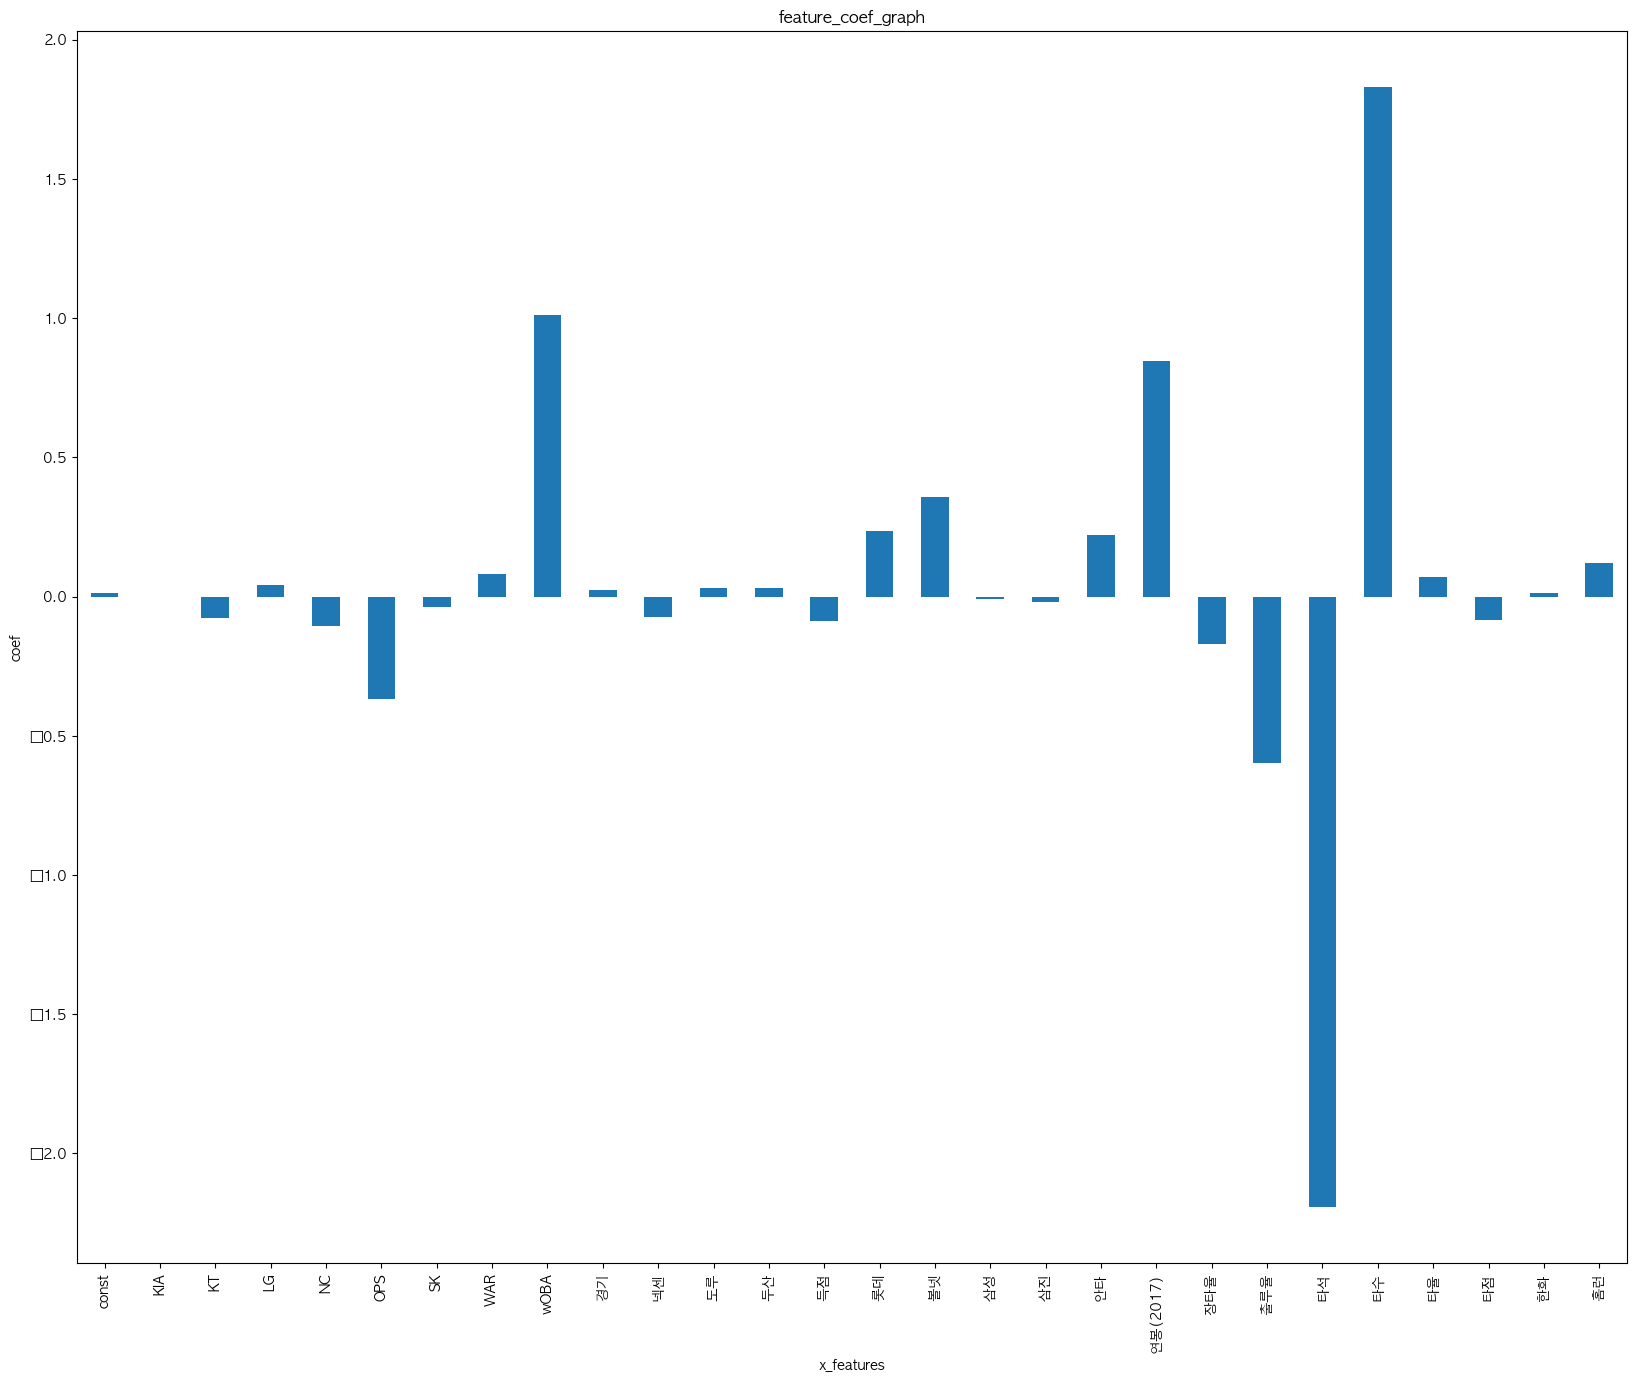

In [32]:
# 한글 출력을 위한 사전 설정 단계입니다.
mpl.rc('font', family='AppleGothic')
plt.rcParams['figure.figsize'] = [20, 16]

# 회귀 계수를 리스트로 반환합니다.
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트로 반환합니다.
x_labels = model.params.index.tolist()

# 회귀 계수를 출력합니다.
ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

-----

### [예측 모델의 평가]

In [33]:
# 학습 데이터와 테스트 데이터로 분리합니다.
X = batter_df[batter_df.columns.difference(['선수명', 'y'])] # 선수명과 y를 뺀 것을 모두 X로 놓는다.
y = batter_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [34]:
print(X)

     KIA  KT  LG  NC       OPS  SK       WAR      wOBA        경기  넥센  ...  \
0      0   0   0   0  1.732763   1  3.857382  1.380264  1.149505   0  ...   
1      1   0   0   0  1.397014   0  3.798140  1.268659  1.413314   0  ...   
2      0   0   0   0  1.318014   0  3.703353  1.212856  1.171489   0  ...   
3      0   0   0   1  1.290364   0  2.873969  1.138453  1.039584   0  ...   
4      0   0   0   0  1.033615   0  2.850272  0.971045  1.457283   0  ...   
..   ...  ..  ..  ..       ...  ..       ...       ...       ...  ..  ...   
186    1   0   0   0 -0.376531   0 -1.101152 -0.303117  1.259426   0  ...   
187    0   0   0   0 -0.171132   0 -1.107076 -0.098507  0.226172   0  ...   
188    0   0   1   0 -0.040782   0 -1.130773  0.041000  0.797759   0  ...   
189    1   0   0   0 -0.878180   0 -1.178166 -0.777440 -0.455336   0  ...   
190    0   0   0   0 -0.775480   0 -1.249256 -0.665834 -0.235495   0  ...   

           안타  연봉(2017)       장타율       출루율        타석        타수        타율  

In [35]:
# 이 부분추가...
y_predictions = lr.predict(X_test)
print(y_predictions)
print(list(y_test))

[-0.52905598 -0.44701575 -0.40687749 -0.03821916 -0.54474834  7.07202311
 -0.49952653 -0.47036066 -0.43405521 -0.64906234 -0.1310245  -0.53979442
 -0.61399002 -0.2805165  -0.42504355 -0.59525896  0.63975647 -0.51981217
 -0.64914583 -0.50451369 -0.52538746  1.35195229  4.29395472 -0.45847016
  0.50353664  1.9094747  -0.34757923 -0.54245178 -0.65982347  0.48090633
  0.99935787 -0.01177179 -0.48716701 -0.4192275  -0.05142827 -0.57371241
  0.31080869 -0.36820588 -0.65471479]
[-0.4104479151739232, -0.37917725231065263, -0.4167020477465773, 0.13678868493331187, -0.5417846991996597, 7.172687829169191, -0.5417846991996597, -0.4104479151739232, -0.45735390946882903, -0.5198952351953702, -0.06647062367794687, -0.5511658980586408, -0.5355305666270055, -0.5574200306312949, -0.42608324660555846, -0.5574200306312949, 0.26187133638639415, -0.5511658980586408, -0.5417846991996597, -0.5449117654859866, -0.4510997768961749, 0.6058486278823705, 4.045621542842134, -0.5386576329133326, 0.2931419992496647, 

## 1-1. 타자(batter)의 모든  feature를 이용하여 Linear Regression을 수행하시오.

In [36]:
# 회귀 분석 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [37]:
#예측값을 예측연본(2018)에 추가
batter_df['예측연봉(2018)'] = pd.Series(y_predictions)

## 1-2. 상기의  Linear Regression에 의해 얻은 모델을 가지고 2018년 연봉을 예측하시오.

In [38]:
# 원래의 데이터 프레임을 다시 로드합니다.
batter = pd.read_csv(batter_file_path)
batter = batter[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
result_df = batter_df
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(batter, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰합니다.
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,최정,3.107502,-0.529056,120000
1,1,최형우,4.045622,-0.447016,150000
2,2,박건우,0.512037,-0.406877,19500
3,3,나성범,0.699661,-0.038219,35000
4,4,손아섭,4.045622,-0.544748,65000
5,5,김선빈,0.230601,7.072023,8000
6,6,버나디나,1.700322,-0.499527,75000
7,7,박민우,0.355683,-0.470361,25000
8,8,김하성,0.355683,-0.434055,22000
9,9,스크럭스,1.543969,-0.649062,80000


## 1-3. 상기의 모델로 예측한 연봉과 실제 연봉, 2017년 연봉을 같이 그래프로 그리시오.

<Axes: xlabel='선수명'>

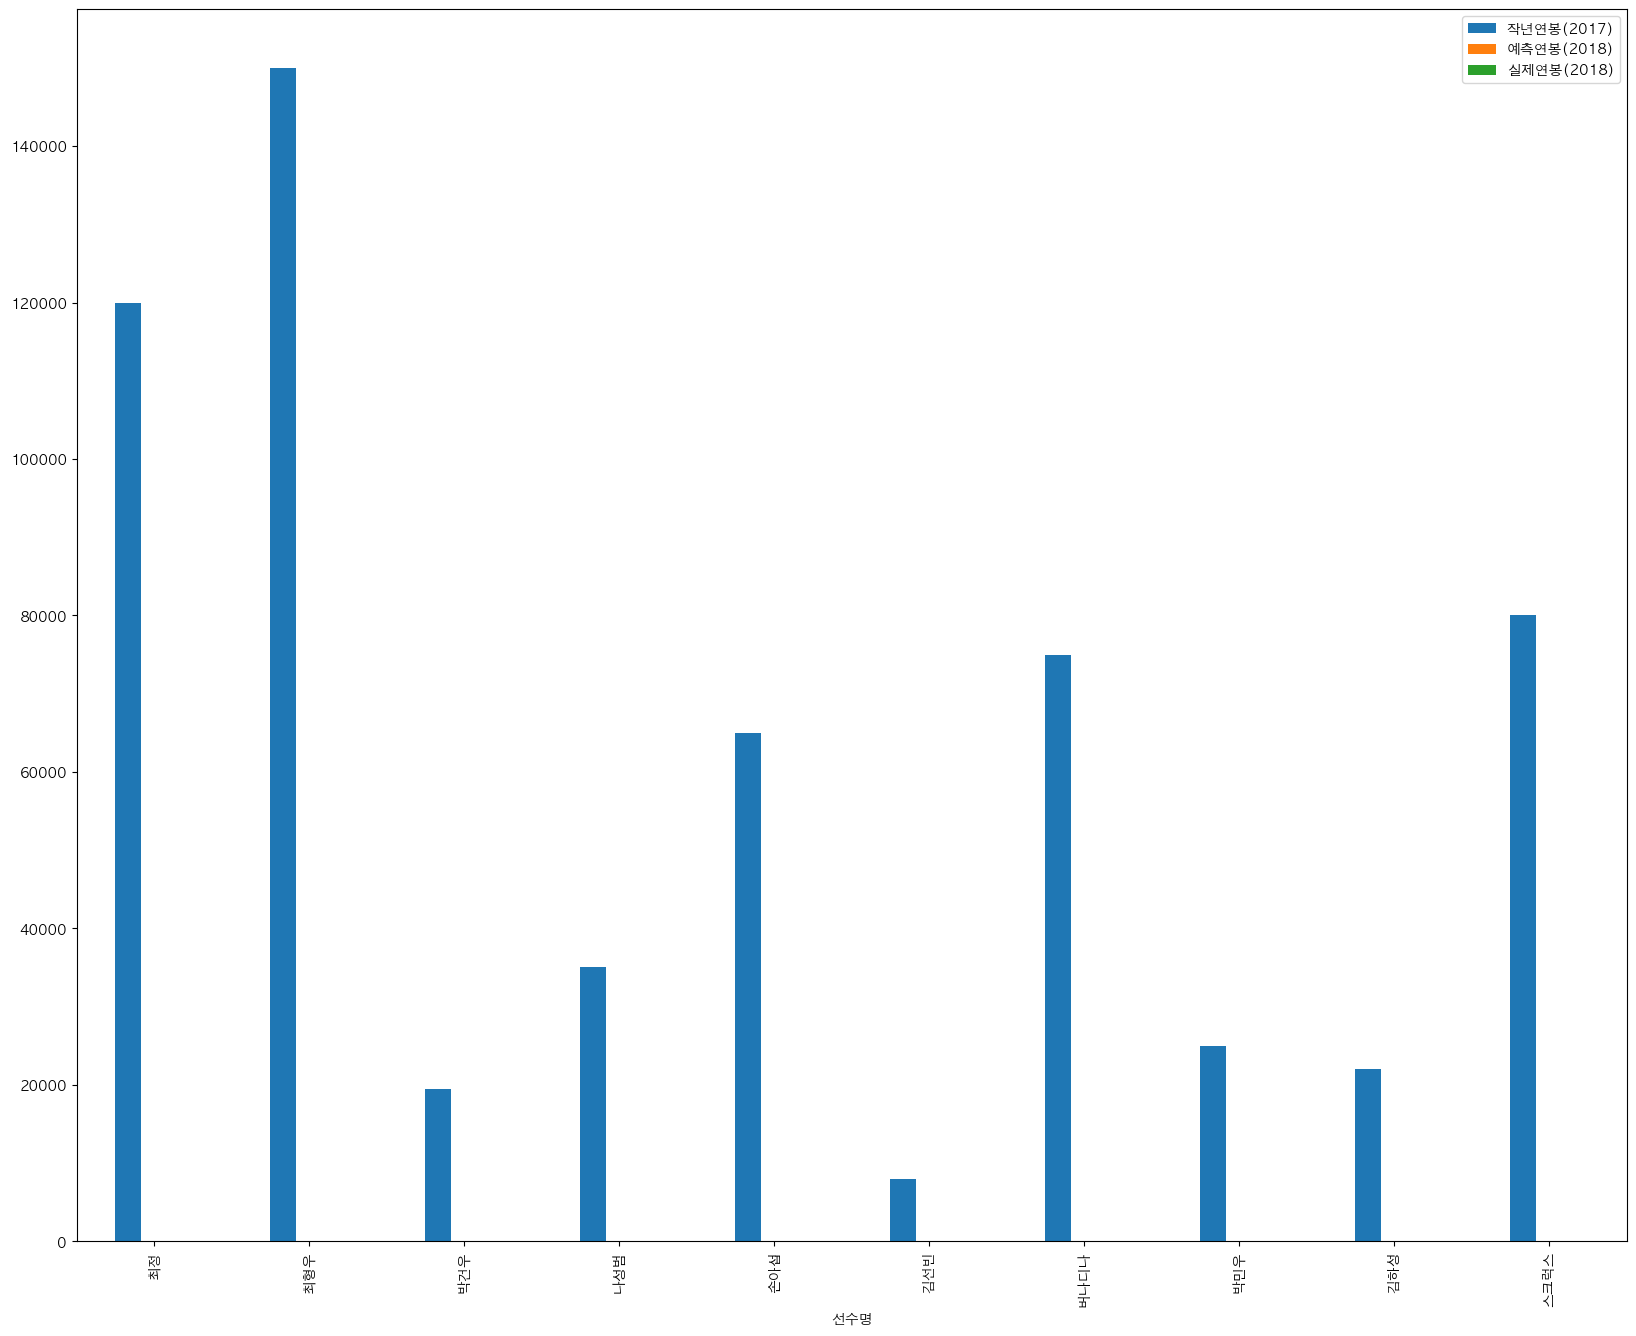

In [39]:
# 선수별 연봉 정보(작년 연봉, 예측 연봉, 실제 연봉)를 bar 그래프로 출력합니다.
mpl.rc('font', family='AppleGothic')
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind="bar")